In [1]:
import requests
import os
def get_qts(sym):
    #print(os.environ)
    api_key=os.environ['alphavantage_key']
    p = {"http":"http://127.0.0.1:8118", "https": "http://127.0.0.1:8118",}
    url="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&outputsize=full&apikey={}".format(sym, api_key)
    r = requests.get(url, proxies=p)
    d=r.json()
    return d
    
intel=get_qts("INTC")
amd=get_qts("AMD")

In [2]:
int_ts=intel['Time Series (Daily)']
amd_ts=amd['Time Series (Daily)']

keys_list_amd=[]
keys_list_intl=[]

for key in int_ts.keys(): keys_list_intl.append(key)
for key in amd_ts.keys(): keys_list_amd.append(key)
print(len(keys_list_amd), len(keys_list_intl), keys_list_amd==keys_list_intl)
arr=[]
for key in keys_list_amd:
    rec= [key, int_ts[key]['4. close'], amd_ts[key]['4. close']]
    arr.append(rec)

5216 5216 True


In [28]:
import pandas as pd

df=pd.DataFrame(arr)
df.columns=['dt','int','amd']
df=df.astype({'dt':str, "int": float, "amd": float})
df=df.sort_values(by='dt',ascending=True)
init_st=df.iloc[0]

int_q=100/init_st['int']
amd_q=100/init_st['amd']


df['int_m']=df['int']*int_q
df['amd_m']=df['amd']*amd_q
df['diff_w']=df['amd_m']-df['int_m']
df=df.reset_index()
df=df.drop(['index'], axis=1)
df.head()

,dt,int,amd,int_m,amd_m,diff_w
0,1999-11-01,76.00,20.31,100.000000,100.000000,0.000000
1,1999-11-02,77.50,20.56,101.973684,101.230921,-0.742763
2,1999-11-03,79.75,21.31,104.934211,104.923683,-0.010528
3,1999-11-04,81.56,20.63,107.315789,101.575579,-5.740211
4,1999-11-05,82.38,21.25,108.394737,104.628262,-3.766475


In [29]:
df.tail()

,dt,int,amd,int_m,amd_m,diff_w
5211,2020-07-20,61.15,57.46,80.460526,282.914820,202.454294
5212,2020-07-21,60.70,57.00,79.868421,280.649926,200.781505
5213,2020-07-22,61.05,61.79,80.328947,304.234367,223.905420
5214,2020-07-23,60.40,59.57,79.473684,293.303791,213.830107
5215,2020-07-24,50.59,69.40,66.565789,341.703594,275.137805


<class 'matplotlib.axes._subplots.AxesSubplot'>


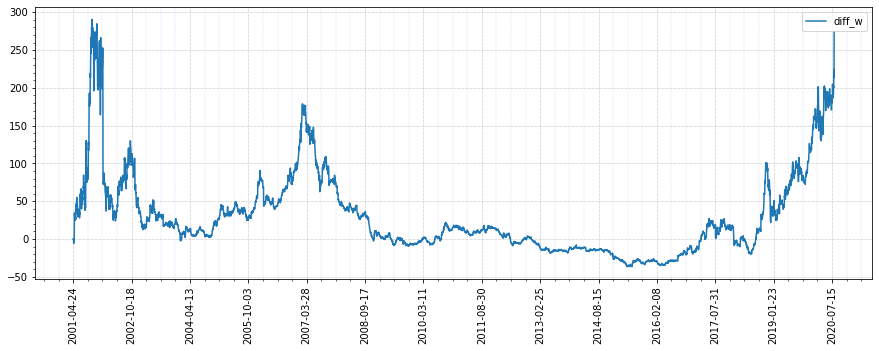

In [120]:
import matplotlib.pyplot as plt

f = df[['diff_w']].plot(rot=90, figsize=(15,5))
print(type(f))
div=int(len(keys_list_amd)/14)
f.xaxis.set_major_locator(plt.MaxNLocator(15))
f.minorticks_on()
f.grid(which='major', color='grey', axis='both', linestyle=':', linewidth=0.5)
f.grid(which='minor', color='b', axis='x', linestyle='--', linewidth=.25, alpha=0.3)
l=f.set_xticklabels(df['dt'][::div])

<class 'matplotlib.axes._subplots.AxesSubplot'>


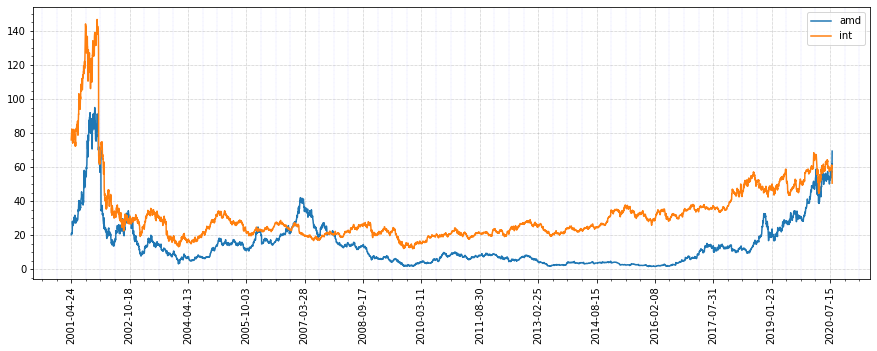

In [121]:
f = df[['amd', 'int']].plot(rot=90, figsize=(15,5))
print(type(f))
div=int(len(keys_list_amd)/14)
f.xaxis.set_major_locator(plt.MaxNLocator(15))
f.minorticks_on()
f.grid(which='major', color='grey', axis='both', linestyle=':', linewidth=0.5)
f.grid(which='minor', color='b', axis='x', linestyle='--', linewidth=.25, alpha=0.3)
l=f.set_xticklabels(df['dt'][::div])